In [97]:

import numpy as np # type: ignore
import pandas as pd  # type: ignore
import matplotlib as mpl # type: ignore


In [98]:
data = pd.read_csv(r'C:\Users\chakr\OneDrive\Desktop\ml\house-price-prediction\data\train.csv')  # while be loading the dat in data variable 

data.head(10)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [99]:
data.info() 
print(data.isnull().sum()) # to check the null values in dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0


# dealing with the missing values

In [100]:
# Drop columns that have more than 50% missing values
data = data.dropna(thresh=len(data)*0.5, axis=1)

# Fill missing values with mean for numerical columns
feature_ncols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in feature_ncols:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing values with mode for categorical columns
feature_ccols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in feature_ccols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check if all missing values are handled
data.info()

# Remove duplicates
data = data.drop_duplicates()

# Preview cleaned data
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#  Data Exploration

# feature Encoding for caterorial variables

In [101]:
from sklearn.preprocessing import LabelEncoder # type: ignore
label = LabelEncoder()

cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in cat_cols:
    data[col] = label.fit_transform(data[col])

print(data)   

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

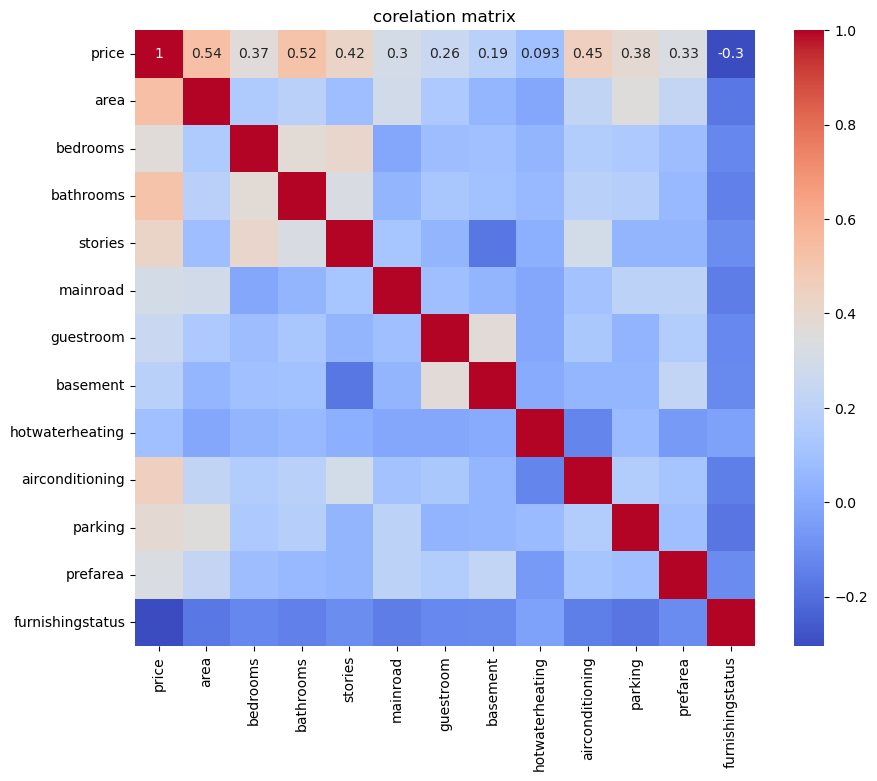

In [102]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

corr_matrix = data.corr()
plt.figure(figsize=(10,8))
plt.title("corelation matrix")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Convert columns in 'feature_ncols' to numeric if possible
for col in feature_ncols:
	data[col] = pd.to_numeric(data[col], errors='coerce')


In [105]:

# 
sorted_corr = corr_matrix['price'].sort_values(ascending=False)
sorted_corr.head()


weak_features = ['hotwaterheating', 'basement', 'furnishingstatus']  # only if correlation is very low
# Drop only the columns that exist in the DataFrame
existing_features = [col for col in weak_features if col in data.columns]
data = data.drop(existing_features, axis=1)


# split the data into train and test

In [ ]:
x = data.drop('price',axis=1)
y = data['price']

In [118]:
from sklearn.model_selection import train_test_split # type: ignore
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # splitting the data into training and testing data

# print(x,y)
# print(f"training sample:{x_train.shape[0]}")
# print(f"testing sample:{x_test.shape[0]}")
print(x_test)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  airconditioning  \
316  5900         4          2        2         0          0                0   
77   6500         3          2        3         1          0                1   
360  4040         2          1        1         1          0                0   
90   5000         3          1        2         1          0                1   
493  3960         3          1        1         1          0                0   
..    ...       ...        ...      ...       ...        ...              ...   
15   6000         4          1        2         1          0                0   
357  6930         4          1        2         0          0                0   
39   6000         4          2        4         1          0                1   
54   6000         3          2        2         1          1                1   
155  6100         3          2        1         1          0                0   

     parking  prefarea  
31

# model training with LInear regresson

In [125]:
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error,r2_score # type: ignore

model = LinearRegression()

model.fit(x_train,y_train)

predict = model.predict(x_test)
print(np.round(predict, 2))

[5168633.6  7191040.88 3139016.4  4630893.32 3240302.61 3869390.25
 5603384.48 6257692.01 3242716.29 2528923.37 9840851.92 3114855.78
 3434845.83 2980684.5  3603170.93 5876017.73 3034627.59 5124206.38
 4297062.65 3585759.79 6049452.18 5823947.79 3049895.65 4967476.2
 5014271.87 7356902.03 3367331.05 4991767.84 7723509.54 3262557.89
 6260626.11 3674812.92 6829101.94 4206046.58 3906175.46 5969944.81
 4732865.76 4335580.81 3499663.19 4617890.88 4687347.93 3838519.16
 7172806.45 3920977.65 3756707.52 4617884.74 6744842.5  4140787.62
 4053016.91 3432734.38 7611805.2  3167351.63 4254579.18 4092741.11
 3647474.57 2576788.74 8090913.35 3245320.35 4287958.72 3084313.12
 4638602.7  3925572.62 5275151.56 4141666.46 5143581.78 4086071.06
 6661948.09 3382078.53 6249749.08 6098291.7  4781365.02 5201335.59
 4398175.27 7646966.82 3888279.84 4953632.21 4056440.12 4801438.8
 4763617.37 4607318.58 7809416.78 4159008.76 6424592.32 5271993.98
 3085769.14 7096665.14 2975903.46 3750029.92 8051022.9  7490685.